### In this notebook you will plot compiled data from the PFISR energy inversions to display in the paper

@author Riley Troyer
science@rileytroyer.com

In [1]:
# Libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# File with compiled data
data_file = ('../../data/processed/chemistry-model-results.xlsx') 

# Read in file with inversion results
inversion_results = pd.read_excel(data_file)

# Calculate an average for each bin
inversion_results.loc[:, 'mean'] = inversion_results.loc[:, ['vickrey',
                                                               'osepian',
                                                               'gledhill',
                                                               'stanford']
                                                          ].mean(axis=1)

# Get only substorm bins
substorm_results = inversion_results.loc[inversion_results['units'] 
                                         == 'min']
substorm_results = substorm_results[0:8]

# Get only AE bins
ae_results = inversion_results.loc[inversion_results['units'] 
                                   == 'AE']

mlt_results = inversion_results.loc[inversion_results['units']
                                    == 'MLT']

substorm_results

,bin,units,threshold,vickrey-old,osepian-old,gledhill-old,stanford-old,vickrey,osepian,gledhill,stanford,stanford-mw,Unnamed: 12,mean
0,0-20,min,high,2.003,1.085,2.406,2.376,2.003000e+15,1.085000e+15,2.406000e+15,2.376000e+15,0.38016,NaN,1.967500e+15
1,0-20,min,low,4.924,3.780,4.681,4.827,4.924000e+15,3.780000e+15,4.681000e+15,4.827000e+15,0.77232,1.15248,4.553000e+15
2,20-40,min,high,1.800,1.002,2.127,2.160,1.800000e+15,1.002000e+15,2.127000e+15,2.160000e+15,0.34560,NaN,1.772250e+15
3,20-40,min,low,4.070,3.108,4.038,4.036,4.070000e+15,3.108000e+15,4.038000e+15,4.036000e+15,0.64576,NaN,3.813000e+15
4,40-60,min,high,1.176,0.618,1.414,1.415,1.176000e+15,6.180000e+14,1.414000e+15,1.415000e+15,0.22640,NaN,1.155750e+15
5,40-60,min,low,3.100,2.273,3.132,3.081,3.100000e+15,2.273000e+15,3.132000e+15,3.081000e+15,0.49296,NaN,2.896500e+15
6,>60,min,high,0.405,0.220,0.467,0.536,4.050000e+14,2.200000e+14,4.670000e+14,5.360000e+14,0.08576,NaN,4.070000e+14
7,>60,min,low,3.476,2.654,3.414,3.421,3.476000e+15,2.654000e+15,3.414000e+15,3.421000e+15,0.54736,0.63312,3.241250e+15


### Plot statistics with all chemistry models

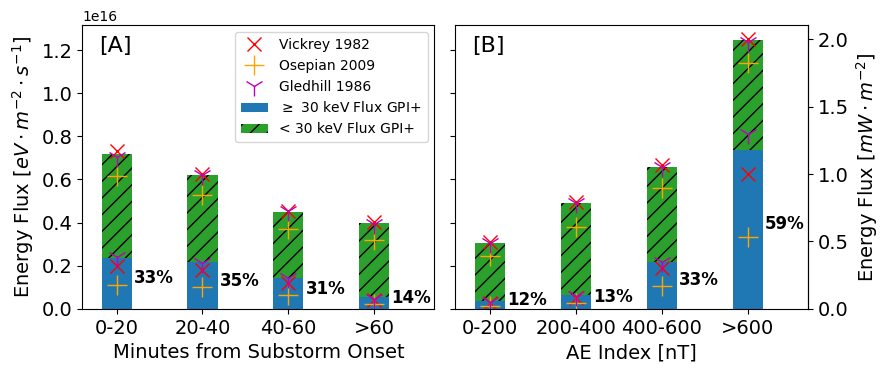

In [4]:
# Plot data as stacked bar chart with both substorm and AE

# Function to add text for percentages
def plot_perc(n):
    high = int(round(norm_high_mean[n]*100, 0))
    low = 100 - high
    ax.text(n + 0.2, high_mean[n] - high_mean[n]*(0.5),
            str(high) + '%', fontsize = 12, fontweight = 'bold')

# Setup plot
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Figure title
#plt.suptitle('Geometric Mean Values', fontsize=14)

# Loop through each axis
for n, ax in enumerate(axs):
    
    if n==0:
        # Bar chart labels
        names = ['0-20', '20-40', '40-60', '>60']
        
        # Data to plot
        plotting_data = substorm_results
        
        # Labels
        xlabel = 'Minutes from Substorm Onset'
        
    if n==1:
        # Bar chart labels
        names = ['0-200', '200-400', '400-600', '>600']
        
        # Data to plot
        plotting_data = ae_results
        
        # Labels
        xlabel = 'AE Index [nT]'

    # High and low energy values and errors
    high_mean = plotting_data[plotting_data['threshold']
                              == 'high']['stanford'].values
    low_mean = plotting_data[plotting_data['threshold']
                             == 'low']['stanford'].values
    
    # Normalized values
    norm_high_mean = high_mean / (high_mean + low_mean)
    norm_low_mean = low_mean / (high_mean + low_mean)

    # Plot bar graphs
    ax.bar(names, high_mean, width=0.35,
           capsize=5, color='C0', label=r'$\geq$ 30 keV Flux GPI+')
    ax.bar(names, low_mean, width=0.35,
           bottom=high_mean, hatch='//',
           capsize=5, color='C2', label='< 30 keV Flux GPI+')
    
    # Get individual chemistry model high and low values
    vickrey_high = plotting_data[plotting_data['threshold']
                                 =='high']['vickrey'].values
    vickrey_low = plotting_data[plotting_data['threshold']
                                =='low']['vickrey'].values
    osepian_high = plotting_data[plotting_data['threshold']
                                 =='high']['osepian'].values
    osepian_low = plotting_data[plotting_data['threshold']
                                =='low']['osepian'].values
    gledhill_high = plotting_data[plotting_data['threshold']
                                  =='high']['gledhill'].values
    gledhill_low = plotting_data[plotting_data['threshold']
                                 =='low']['gledhill'].values
    stanford_high = plotting_data[plotting_data['threshold']
                                  =='high']['stanford'].values
    stanford_low = plotting_data[plotting_data['threshold']
                                 =='low']['stanford'].values
    
    # Plot individual ontop of bar chart
    ax.plot(names, vickrey_high, color='red',
            marker='x', markersize=10, linestyle='None',
            label='Vickrey 1982')
    ax.plot(names, vickrey_low + high_mean, color='red',
            marker='x', markersize=10, linestyle='None')
    
    ax.plot(names, osepian_high, color='orange',
            marker='+', markersize=15, linestyle='None',
            label='Osepian 2009')
    ax.plot(names, osepian_low + high_mean, color='orange',
            marker='+', markersize=15, linestyle='None')
    
    ax.plot(names, gledhill_high, color='m',
            marker='1', markersize=15, linestyle='None',
            label='Gledhill 1986')
    ax.plot(names, gledhill_low + high_mean, color='m',
            marker='1', markersize=15, linestyle='None')
#     ax.plot(names, stanford_high, color='red',
#             marker='.', linestyle='None')
#     ax.plot(names, stanford_low + high_mean, color='orange',
#             marker='.', linestyle='None')

    # Edit titles and labels
    ax.tick_params(which='major', labelsize=14)
    ax.set_xlabel(xlabel,
                  fontsize = 14)
    ax.set_xlim(-0.4, 3.7)
    #ax.set_ylim(5e13, 4e16)
    #ax.set_yscale('log')

    # Add percentages
    for n in [0, 1, 2, 3]:
        plot_perc(n)
    
# Setup axis
axs[0].set_ylabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
              r'\right]}$', fontsize = 14)

axs[0].yaxis.tick_left()
axs[0].yaxis.set_label_position("left")

# Add secondary y axis
def eV2mJ(x):
    return x * 1.6e-16
def mJ2eV(x):
    return x / 1.6e-16

secax = axs[1].secondary_yaxis('right', functions=(eV2mJ, mJ2eV))
secax.set_ylabel(r'Energy Flux ${\left[mW \cdot m^{-2}'
                 r'\right]}$', fontsize = 14)
secax.tick_params(axis='y', which='major', labelsize=14)

# Legend
axs[0].legend(loc='upper right')

# Add text
axs[0].text(-0.2, 1.19e16, '[A]', fontsize=16)
axs[1].text(-0.2, 1.19e16, '[B]', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

# # Save the figure
# save_dir = ('reports/figures/paper/')   
# plt.savefig(save_dir + 
#             'substorm-ae-energy-plot-30kev-4-bins-all-appendix.jpg',
#             dpi=300, bbox_inches='tight')

### Plot results with only GPI+

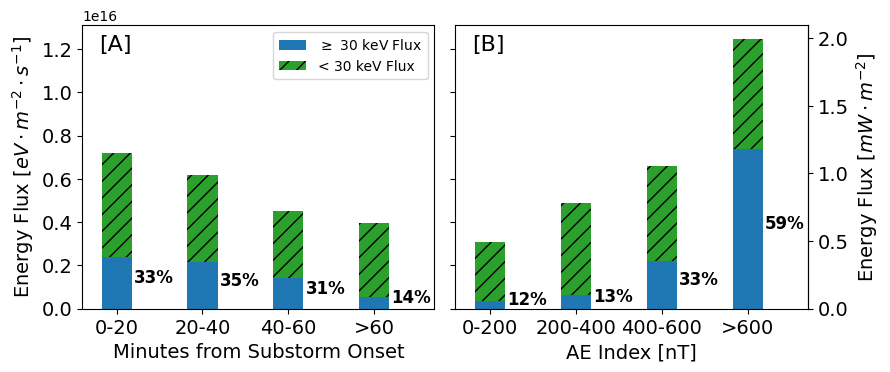

In [5]:
# Plot data as stacked bar chart with both substorm and AE

# Function to add text for percentages
def plot_perc(n):
    high = int(round(norm_high_mean[n]*100, 0))
    low = 100 - high
    ax.text(n + 0.2, high_mean[n] - high_mean[n]*(0.5),
            str(high) + '%', fontsize = 12, fontweight = 'bold')

# Setup plot
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Figure title
#plt.suptitle('Geometric Mean Values', fontsize=14)

# Loop through each axis
for n, ax in enumerate(axs):
    
    if n==0:
        # Bar chart labels
        names = ['0-20', '20-40', '40-60', '>60']
        
        # Data to plot
        plotting_data = substorm_results
        
        # Labels
        xlabel = 'Minutes from Substorm Onset'
        
    if n==1:
        # Bar chart labels
        names = ['0-200', '200-400', '400-600', '>600']
        
        # Data to plot
        plotting_data = ae_results
        
        # Labels
        xlabel = 'AE Index [nT]'

    # High and low energy values and errors
    high_mean = plotting_data[plotting_data['threshold']
                              == 'high']['stanford'].values
    low_mean = plotting_data[plotting_data['threshold']
                             == 'low']['stanford'].values
    
    # Normalized values
    norm_high_mean = high_mean / (high_mean + low_mean)
    norm_low_mean = low_mean / (high_mean + low_mean)

    # Plot bar graphs
    ax.bar(names, high_mean, width=0.35,
           capsize=5, color='C0', label=r'$\geq$ 30 keV Flux')
    ax.bar(names, low_mean, width=0.35,
           bottom=high_mean, hatch='//',
           capsize=5, color='C2', label='< 30 keV Flux')
    
    # Get individual chemistry model high and low values
    stanford_high = plotting_data[plotting_data['threshold']
                                  =='high']['stanford'].values
    stanford_low = plotting_data[plotting_data['threshold']
                                 =='low']['stanford'].values
    

    # Edit titles and labels
    ax.tick_params(which='major', labelsize=14)
    ax.set_xlabel(xlabel,
                  fontsize = 14)
    ax.set_xlim(-0.4, 3.7)
    #ax.set_ylim(5e13, 4e16)
    #ax.set_yscale('log')

    # Add percentages
    for n in [0, 1, 2, 3]:
        plot_perc(n)
    
# Setup axis
axs[0].set_ylabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
              r'\right]}$', fontsize = 14)

axs[0].yaxis.tick_left()
axs[0].yaxis.set_label_position("left")

# Add secondary y axis
def eV2mJ(x):
    return x * 1.6e-16
def mJ2eV(x):
    return x / 1.6e-16

secax = axs[1].secondary_yaxis('right', functions=(eV2mJ, mJ2eV))
secax.set_ylabel(r'Energy Flux ${\left[mW \cdot m^{-2}'
                 r'\right]}$', fontsize = 14)
secax.tick_params(axis='y', which='major', labelsize=14)

# Legend
axs[0].legend(loc='upper right')

# Add text
axs[0].text(-0.2, 1.19e16, '[A]', fontsize=16)
axs[1].text(-0.2, 1.19e16, '[B]', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

# # Save the figure
# save_dir = save_dir = ('reports/figures/paper/')   
# plt.savefig(save_dir + 
#             'substorm-ae-energy-plot-30kev-4-bins-gpi-main.jpg',
#             dpi=300, bbox_inches='tight')

### Individual plots

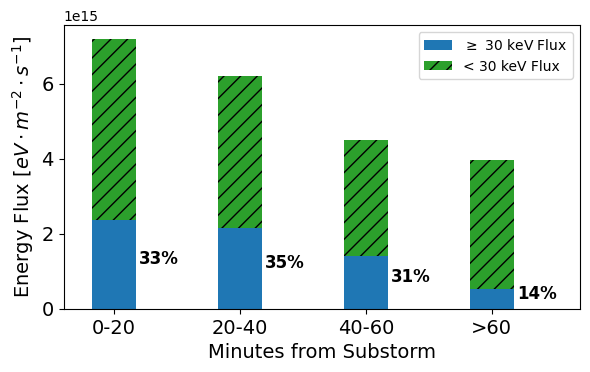

In [6]:
# Plot data as stacked bar chart with both substorm and AE

# Function to add text for percentages
def plot_perc(n):
    high = int(round(norm_high_mean[n]*100, 0))
    low = 100 - high
    ax.text(n + 0.2, high_mean[n] - high_mean[n]*(0.5),
            str(high) + '%', fontsize = 12, fontweight = 'bold')

# Setup plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)

    
# Bar chart labels
names = ['0-20', '20-40', '40-60', '>60']

# Data to plot
plotting_data = substorm_results

# Labels
xlabel = 'Minutes from Substorm'

# High and low energy values and errors
high_mean = plotting_data[plotting_data['threshold']
                          == 'high']['stanford'].values
low_mean = plotting_data[plotting_data['threshold']
                         == 'low']['stanford'].values

# Normalized values
norm_high_mean = high_mean / (high_mean + low_mean)
norm_low_mean = low_mean / (high_mean + low_mean)

# Plot bar graphs
ax.bar(names, high_mean, width=0.35,
       capsize=5, color='C0', label=r'$\geq$ 30 keV Flux')
ax.bar(names, low_mean, width=0.35,
       bottom=high_mean, hatch='//',
       capsize=5, color='C2', label='< 30 keV Flux')

# Get individual chemistry model high and low values
stanford_high = plotting_data[plotting_data['threshold']
                              =='high']['stanford'].values
stanford_low = plotting_data[plotting_data['threshold']
                             =='low']['stanford'].values


# Edit titles and labels
ax.tick_params(which='major', labelsize=14)
ax.set_xlabel(xlabel,
              fontsize = 14)
ax.set_xlim(-0.4, 3.7)
#ax.set_ylim(5e13, 4e16)
#ax.set_yscale('log')

# Add percentages
for n in [0, 1, 2, 3]:
    plot_perc(n)
    
# Setup axis
ax.set_ylabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
              r'\right]}$', fontsize = 14)

ax.yaxis.tick_left()
ax.yaxis.set_label_position("left")

# Add secondary y axis
def eV2mJ(x):
    return x * 1.6e-16
def mJ2eV(x):
    return x / 1.6e-16

# Legend
ax.legend(loc='upper right')


plt.tight_layout()
plt.subplots_adjust(top=0.88)

# # Save the figure
# save_dir = save_dir = ('reports/figures/paper/')   
# plt.savefig(save_dir + 
#             'only-substorm-energy-plot-30kev-4-bins.jpg',
#             dpi=200, bbox_inches='tight')

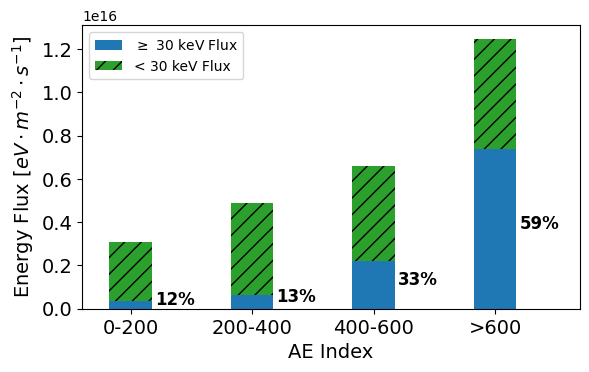

In [7]:
# Plot data as stacked bar chart with both substorm and AE

# Function to add text for percentages
def plot_perc(n):
    high = int(round(norm_high_mean[n]*100, 0))
    low = 100 - high
    ax.text(n + 0.2, high_mean[n] - high_mean[n]*(0.5),
            str(high) + '%', fontsize = 12, fontweight = 'bold')

# Setup plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)

    
# Bar chart labels
names = ['0-200', '200-400', '400-600', '>600']

# Data to plot
plotting_data = ae_results

# Labels
xlabel = 'AE Index'

# High and low energy values and errors
high_mean = plotting_data[plotting_data['threshold']
                          == 'high']['stanford'].values
low_mean = plotting_data[plotting_data['threshold']
                         == 'low']['stanford'].values

# Normalized values
norm_high_mean = high_mean / (high_mean + low_mean)
norm_low_mean = low_mean / (high_mean + low_mean)

# Plot bar graphs
ax.bar(names, high_mean, width=0.35,
       capsize=5, color='C0', label=r'$\geq$ 30 keV Flux')
ax.bar(names, low_mean, width=0.35,
       bottom=high_mean, hatch='//',
       capsize=5, color='C2', label='< 30 keV Flux')

# Get individual chemistry model high and low values
stanford_high = plotting_data[plotting_data['threshold']
                              =='high']['stanford'].values
stanford_low = plotting_data[plotting_data['threshold']
                             =='low']['stanford'].values


# Edit titles and labels
ax.tick_params(which='major', labelsize=14)
ax.set_xlabel(xlabel,
              fontsize = 14)
ax.set_xlim(-0.4, 3.7)
#ax.set_ylim(5e13, 4e16)
#ax.set_yscale('log')

# Add percentages
for n in [0, 1, 2, 3]:
    plot_perc(n)
    
# Setup axis
ax.set_ylabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
              r'\right]}$', fontsize = 14)

ax.yaxis.tick_left()
ax.yaxis.set_label_position("left")

# Add secondary y axis
def eV2mJ(x):
    return x * 1.6e-16
def mJ2eV(x):
    return x / 1.6e-16

# Legend
ax.legend(loc='upper left')


plt.tight_layout()
plt.subplots_adjust(top=0.88)

# # Save the figure
# save_dir = ('reports/figures/paper/')    
# plt.savefig(save_dir + 
#             'only-ae-energy-plot-30kev-4-bins.jpg',
#             dpi=200, bbox_inches='tight')

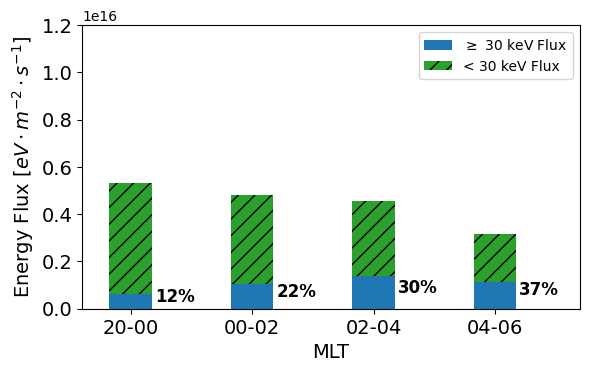

In [8]:
# Plot data as stacked bar chart with both substorm and AE

# Function to add text for percentages
def plot_perc(n):
    high = int(round(norm_high_mean[n]*100, 0))
    low = 100 - high
    ax.text(n + 0.2, high_mean[n] - high_mean[n]*(0.5),
            str(high) + '%', fontsize = 12, fontweight = 'bold')

# Setup plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)

    
# Bar chart labels
names = ['20-00', '00-02', '02-04', '04-06']

# Data to plot
plotting_data = mlt_results

# Labels
xlabel = 'MLT'

# High and low energy values and errors
high_mean = plotting_data[plotting_data['threshold']
                          == 'high']['stanford'].values
low_mean = plotting_data[plotting_data['threshold']
                         == 'low']['stanford'].values

# Normalized values
norm_high_mean = high_mean / (high_mean + low_mean)
norm_low_mean = low_mean / (high_mean + low_mean)

# Plot bar graphs
ax.bar(names, high_mean, width=0.35,
       capsize=5, color='C0', label=r'$\geq$ 30 keV Flux')
ax.bar(names, low_mean, width=0.35,
       bottom=high_mean, hatch='//',
       capsize=5, color='C2', label='< 30 keV Flux')

# Get individual chemistry model high and low values
stanford_high = plotting_data[plotting_data['threshold']
                              =='high']['stanford'].values
stanford_low = plotting_data[plotting_data['threshold']
                             =='low']['stanford'].values


# Edit titles and labels
ax.tick_params(which='major', labelsize=14)
ax.set_xlabel(xlabel,
              fontsize = 14)
ax.set_xlim(-0.4, 3.7)
ax.set_ylim(0, 1.2e16)
#ax.set_yscale('log')

# Add percentages
for n in [0, 1, 2, 3]:
    plot_perc(n)
    
# Setup axis
ax.set_ylabel(r'Energy Flux ${\left[eV \cdot m^{-2}\cdot s^{-1}'
              r'\right]}$', fontsize = 14)

ax.yaxis.tick_left()
ax.yaxis.set_label_position("left")

# Add secondary y axis
def eV2mJ(x):
    return x * 1.6e-16
def mJ2eV(x):
    return x / 1.6e-16

# Legend
ax.legend(loc='upper right')


plt.tight_layout()
plt.subplots_adjust(top=0.88)

# # Save the figure
# save_dir = ('reports/figures/paper/')     
# plt.savefig(save_dir + 
#             'only-mlt-energy-plot-30kev-4-bins.jpg',
#             dpi=200, bbox_inches='tight')